In [ ]:
# ===============================
# 1. IMPORT LIBRARY
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [ ]:
# ===============================
# 2. LOAD DATA
# ===============================
df = pd.read_csv("Campus Recruitment.csv")

df.head()


,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [ ]:
print("Shape:", df.shape)


Shape: (215, 15)


In [ ]:
df.isnull().sum()


,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [ ]:
df['status kelulusan (Bekerja/Belum)'].value_counts()


,count
status kelulusan (Bekerja/Belum),
Placed,148
Not Placed,67


In [ ]:
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

df.head()


,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [ ]:
if 'Gaji' in df.columns:
    df.drop('Gaji', axis=1, inplace=True)

df.head()


,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum)
0,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
if 'Jenis Kelamin' in df.columns and df['Jenis Kelamin'].isnull().any():
    df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0], inplace=True)


df['Jenis Kelamin'].value_counts()


,count
Jenis Kelamin,
M,133
F,73
Male,7
Female,2


In [ ]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum)
0,2,67.00,0,91.00,0,1,58.00,2,0,55.0,1,58.80,1
1,2,79.33,1,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,2,65.00,1,68.00,2,0,64.00,0,0,75.0,0,57.80,1
3,2,56.00,1,52.00,2,2,52.00,2,0,66.0,1,59.43,0
4,2,85.80,1,73.60,1,1,73.30,0,0,96.8,0,55.50,1


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

df.isnull().sum()


,0
Jenis Kelamin,0
Nilai rata-rata SMP,0
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,0
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0
Nilai tes kemampuan kerja,0


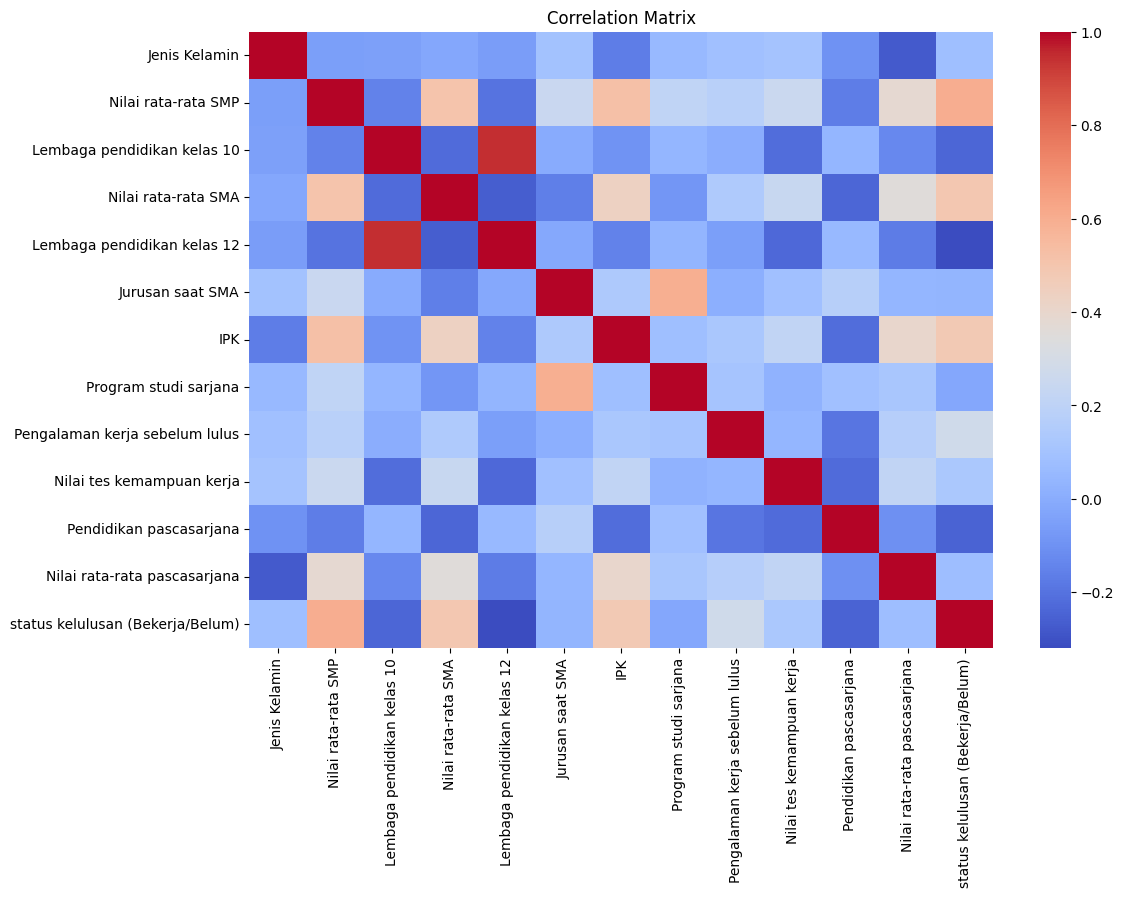

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


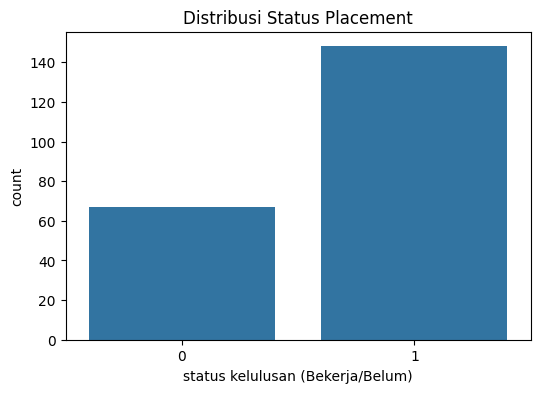


proportion

status kelulusan (Bekerja/Belum)
1    0.688372
0    0.311628
Name: proportion, dtype: float64


In [ ]:
# ===============================
# DISTRIBUSI STATUS PLACEMENT
# ===============================

plt.figure(figsize=(6,4))
sns.countplot(x='status kelulusan (Bekerja/Belum)', data=df)

plt.title("Distribusi Status Placement")
plt.xlabel("status kelulusan (Bekerja/Belum)")
plt.ylabel("count")

plt.show()


# ===============================
# PROPORSI (PERSENTASE)
# ===============================

proportion = df['status kelulusan (Bekerja/Belum)'].value_counts(normalize=True)

print("\nproportion\n")
print(proportion)


In [ ]:
X = df.drop('status kelulusan (Bekerja/Belum)', axis=1)
y = df['status kelulusan (Bekerja/Belum)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((172, 12), (43, 12))

In [ ]:
X = df.drop('status kelulusan (Bekerja/Belum)', axis=1)
y = df['status kelulusan (Bekerja/Belum)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((172, 12), (43, 12))

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("===== LOGISTIC REGRESSION =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


===== LOGISTIC REGRESSION =====
Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("===== DECISION TREE =====")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


===== DECISION TREE =====
Accuracy: 0.813953488372093
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.90      0.84      0.87        31

    accuracy                           0.81        43
   macro avg       0.77      0.79      0.78        43
weighted avg       0.83      0.81      0.82        43



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("===== RANDOM FOREST =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


===== RANDOM FOREST =====
Accuracy: 0.813953488372093
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43



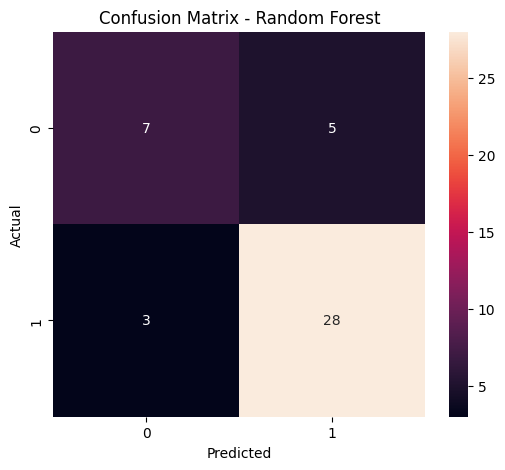

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Nilai rata-rata SMP               0.303826
IPK                               0.195020
Nilai rata-rata SMA               0.155480
Nilai rata-rata pascasarjana      0.103743
Nilai tes kemampuan kerja         0.065242
Lembaga pendidikan kelas 12       0.052707
Pengalaman kerja sebelum lulus    0.035086
Pendidikan pascasarjana           0.024881
Lembaga pendidikan kelas 10       0.021097
Jenis Kelamin                     0.017898
Jurusan saat SMA                  0.016343
Program studi sarjana             0.008678
dtype: float64


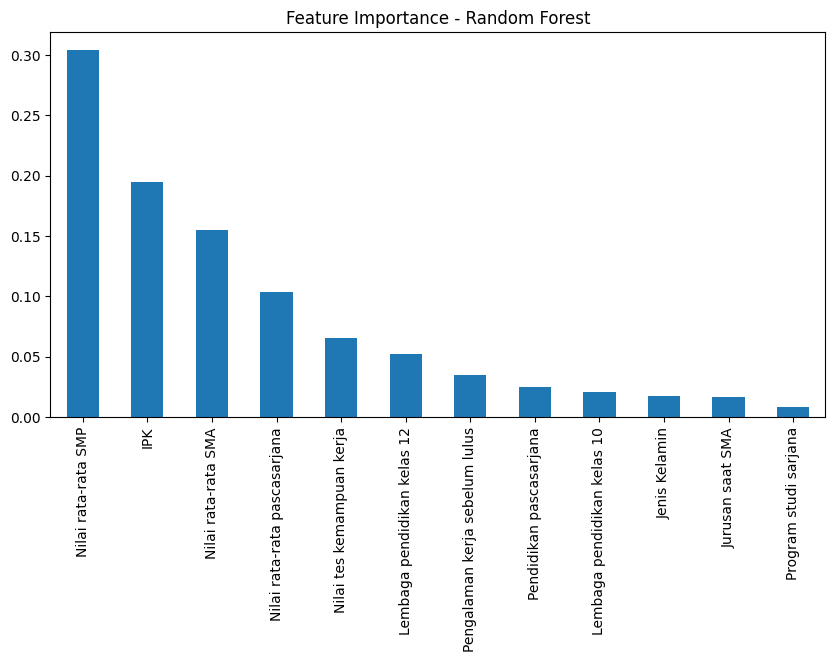

In [ ]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(importances)

plt.figure(figsize=(10,5))
importances.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()
